# Easy21 via Reinforcement Learning Techniques

This notebook investigates the implementation of various reinforcement learning techniques against the game "Easy21" illustrated by [this](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/Easy21-Johannes.pdf) assignment under the RL course by Professor David Silver at UCL.



In [64]:
import simulation
import environment
import player
import q_players
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

## Basic Q Learner
We'll initialize 3 different players. 

First, a very basic implementation of a Q Learner. This agent uses a Q-Table and the Monte Carlo. 

The second a third players are for comparison against the learning agent. The naive player uses a simple heuristic for play: If the card total is 18 or higher, the player sticks. Otherwise, the player hits. 
The basic player chooses its actions purely randomly, and is a baseline measure of performance. 

In [66]:
q_learner = q_players.QLearner_Basic()
naive_player = player.Naive_Player()
basic_player = player.Basic_Player()
env = environment.Environment()



In [ ]:
Q_trials = 1000000
train_wins,train_win_rate = simulation.simulate(q_learner,env,n_trials=Q_trials)

In [11]:
test_trials = 10000
#Train Q Learner

q_learner.setLearning(False)
wins_q,win_rate_Q = simulation.simulate(q_learner,env,n_trials=test_trials)
wins_naive,win_rate_naive = simulation.simulate(naive_player,env,n_trials=test_trials)
wins_basic,win_rate_basic = simulation.simulate(basic_player,env,n_trials=test_trials)

print("Q Learner won {} games, with a win rate of {:.2f}".format(sum(wins_q),win_rate_Q))
print("Naive Player won {} games, with a win rate of {:.2f}".format(sum(wins_naive),win_rate_naive))
print("Basic (Random) player won {} games, with a win rate of {:.2f}".format(sum(wins_basic),win_rate_basic))

Simulating...
Loading game 0
Simulating...
Loading game 0
Simulating...
Loading game 0
Q Learner won 4057 games, with a win rate of 0.41
Naive Player won 4260 games, with a win rate of 0.43
Basic (Random) player won 2406 games, with a win rate of 0.24


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


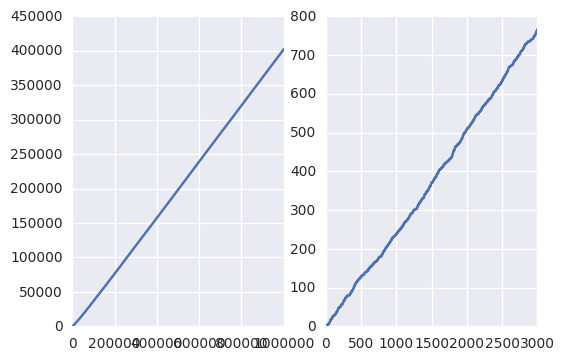

In [69]:
cum_wins = np.cumsum(wins)
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(range(1,Q_trials+1),cum_wins)
ax2.plot(range(3000),cum_wins[:3000])
fig.show()

### Plotting the value space

The learned value space of the game can be plotted by the function below.


In [62]:
def plot_value_space(Q_Table):
    ##Cumulative wins
    dealer_range = range(1,11)
    player_sum = range(11,22)
    value_space = np.zeros([len(dealer_range)*len(player_sum),3])
    
    count = 0
    for dealer_start in dealer_range:
        for p_sum in range(11,22):
            action_dict = Q_Table[(dealer_start,p_sum)]
            value = np.max(list(action_dict.values()))
            value_space[count,:] = [dealer_start,p_sum,value]
            count+=1
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.plot_trisurf(value_space[:,0],value_space[:,1],value_space[:,2])
    

### Plotting the value space
The agents estimated value of this space is plotted below. The value (shown on the z-axis) can be interpreted as the agent's belief it will win the game based on the current game state (represented by the x and y axes) 


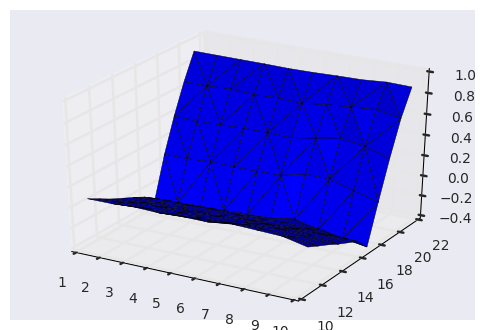

In [63]:
plot_value_space(table)